## This notebook will try to answer one question: Does the fitness wearables make people more healthy?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/fitness-consumer-survey-data/survey 605.csv')

In [3]:
df.head(2)

,Timestamp,What is your age?,What is your gender?,What is your highest level of education?,What is your current occupation?,How often do you exercise in a week?,How long have you been using a fitness wearable?,How frequently do you use your fitness wearable?,How often do you track fitness data using wearable?,How has the fitness wearable impacted your fitness routine?,...,How engaged do you feel with your fitness wearable?,Does using a fitness wearable make you feel more connected to the fitness community?,How has the fitness wearable helped you achieve your fitness goals?,How has the fitness wearable impacted your overall health?,Has the fitness wearable improved your sleep patterns?,Do you feel that the fitness wearable has improved your overall well-being?,Has using a fitness wearable influenced your decision? [To exercise more?],Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?],Has using a fitness wearable influenced your decision? [To join a gym or fitness class?],Has using a fitness wearable influenced your decision? [To change your diet?]
0,2023/03/30 9:43:19 PM GMT+5:30,18-24,Male,Some college or associate degree,Student,5 or more times a week,Less than 6 months,Daily,Every day,Positively impacted my fitness routine,...,Very engaged,Agree,No impact on achieving my goals,No impact on my overall health,Agree,Neutral,Strongly agree,Neutral,Agree,Agree
1,2023/03/31 5:07:46 PM GMT+5:30,Under 18,Male,Bachelor's degree,Student,5 or more times a week,Less than 6 months,3-4 times a week,Once a week,Positively impacted my fitness routine,...,Somewhat engaged,Agree,Helped me achieve my goals somewhat more quickly,Improved my overall health somewhat,Agree,Strongly agree,Agree,Neutral,Neutral,Neutral


Data size, number of columns, number of NaN values, data types

In [4]:
df.shape, df.isnull().sum().sum(), df.dtypes.value_counts()

((30, 22),
 0,
 object    22
 dtype: int64)

<AxesSubplot:xlabel='What is your age?', ylabel='count'>

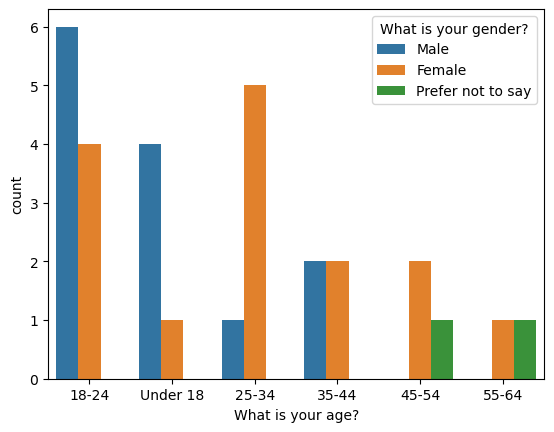

In [5]:
sns.countplot(data=df, x='What is your age?', hue='What is your gender?')

In this dataset it looks like most of the males are below age 24, and females are more even distributed through the age ranges provided in the survey.

In [6]:
df.columns

Index(['Timestamp', 'What is your age?', 'What is your gender?',
       'What is your highest level of education?',
       'What is your current occupation?',
       'How often do you exercise in a week?',
       'How long have you been using a fitness wearable?',
       'How frequently do you use your fitness wearable?',
       'How often do you track fitness data using wearable?',
       'How has the fitness wearable impacted your fitness routine?',
       'Has the fitness wearable helped you stay motivated to exercise?',
       'Do you think that the fitness wearable has made exercising more enjoyable?',
       'How engaged do you feel with your fitness wearable?',
       'Does using a fitness wearable make you feel more connected to the fitness community?',
       'How has the fitness wearable helped you achieve your fitness goals?',
       'How has the fitness wearable impacted your overall health?',
       'Has the fitness wearable improved your sleep patterns?',
       'Do you f

### From now on, I will explore questions starting from How or Has, because this columns answers notebook question the best. Data consists of only categorical variables, which makes it hard to create many different types of informative plots, that's why I focused on using countplots.

#### Taking columns where questions starts with How

In [7]:
how_columns = [5, 6, 7, 8, 9, 12, 14, 15]
df.columns[how_columns]

Index(['How often do you exercise in a week?',
       'How long have you been using a fitness wearable?',
       'How frequently do you use your fitness wearable?',
       'How often do you track fitness data using wearable?',
       'How has the fitness wearable impacted your fitness routine?',
       'How engaged do you feel with your fitness wearable?',
       'How has the fitness wearable helped you achieve your fitness goals?',
       'How has the fitness wearable impacted your overall health?'],
      dtype='object')

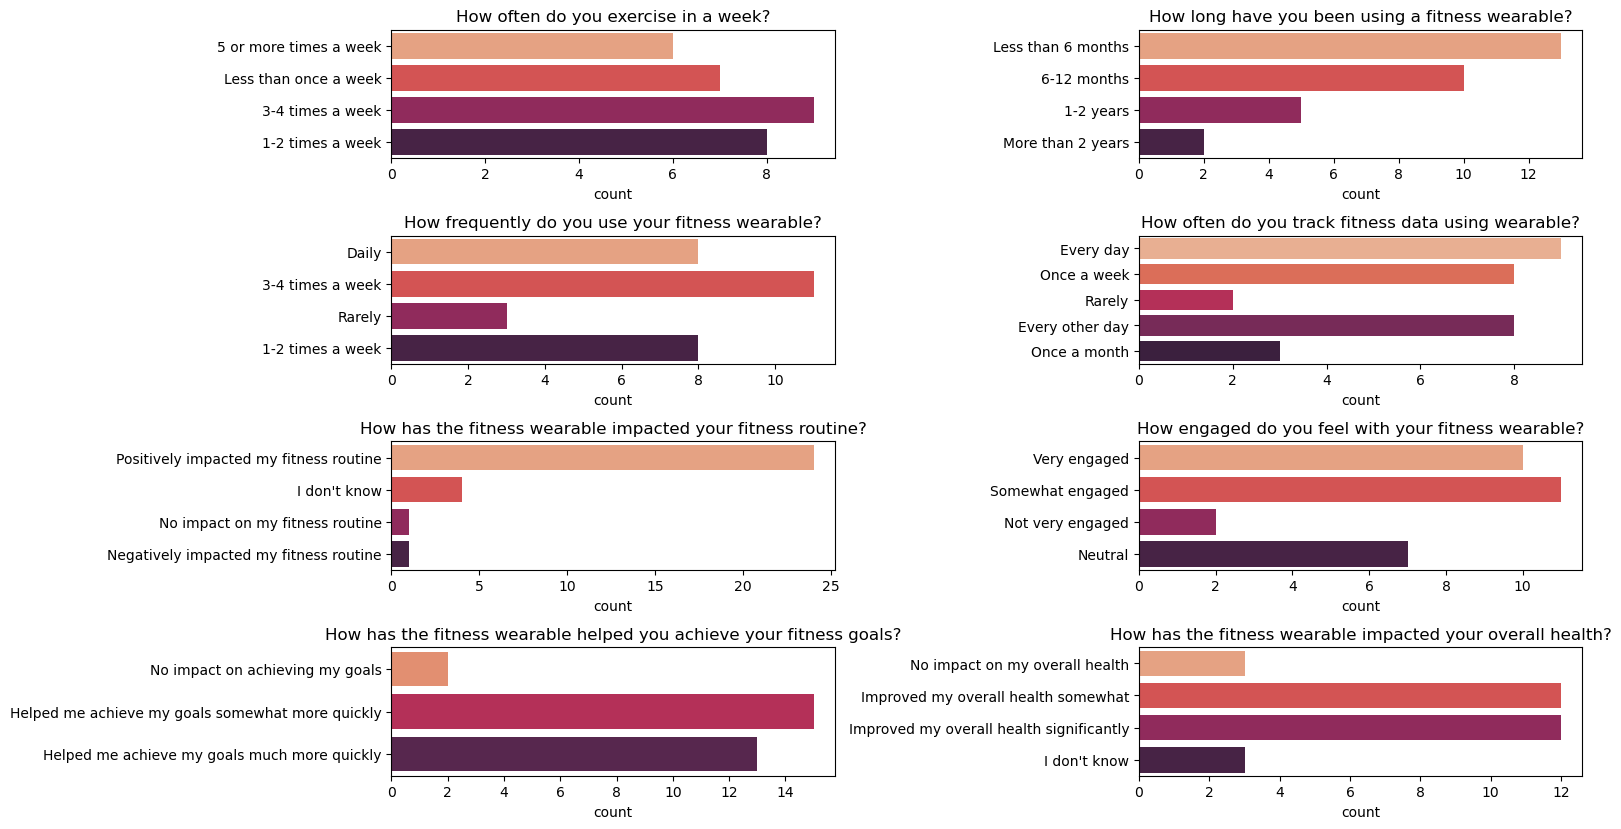

In [8]:
plt.figure(figsize=(16, 10))
for count, column in enumerate(how_columns):
    plt.subplot((len(how_columns) // 2) + 1,2 , count + 1)
    ax = sns.countplot(data=df, y=df.columns[column], palette="rocket_r")
    ax.set(ylabel=None)
    plt.title(df.columns[column])
    plt.tight_layout(pad=1.)
plt.show()

### Its clear from every plot that fitness werables have postive impact on people, from making them more engaged to helping to achive fitness goals.

##### Plot showing how long do people use their fitness wearable, compared to how often do they exercise weekly

<AxesSubplot:xlabel='How often do you exercise in a week?', ylabel='count'>

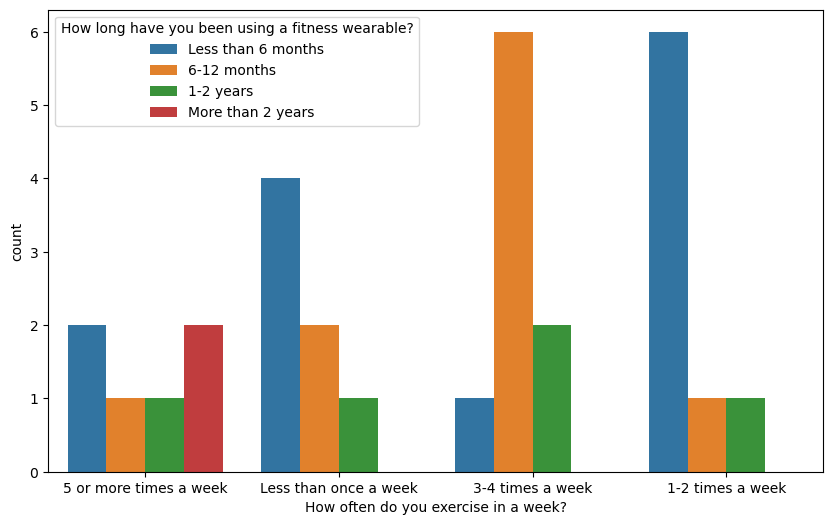

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='How often do you exercise in a week?', hue='How long have you been using a fitness wearable?',)

It's hard to tell if there is correlation between long using fintess wearables to exercise more times a week.

#### Taking columns where questions starts with Has

In [10]:
has_columns = [10, 16, 18, 19, 20, 21]
df.columns[has_columns]

Index(['Has the fitness wearable helped you stay motivated to exercise?',
       'Has the fitness wearable improved your sleep patterns?',
       'Has using a fitness wearable influenced your decision? [To exercise more?]',
       'Has using a fitness wearable influenced your decision? [To purchase other fitness-related products?]',
       'Has using a fitness wearable influenced your decision? [To join a gym or fitness class?]',
       'Has using a fitness wearable influenced your decision? [To change your diet?]'],
      dtype='object')

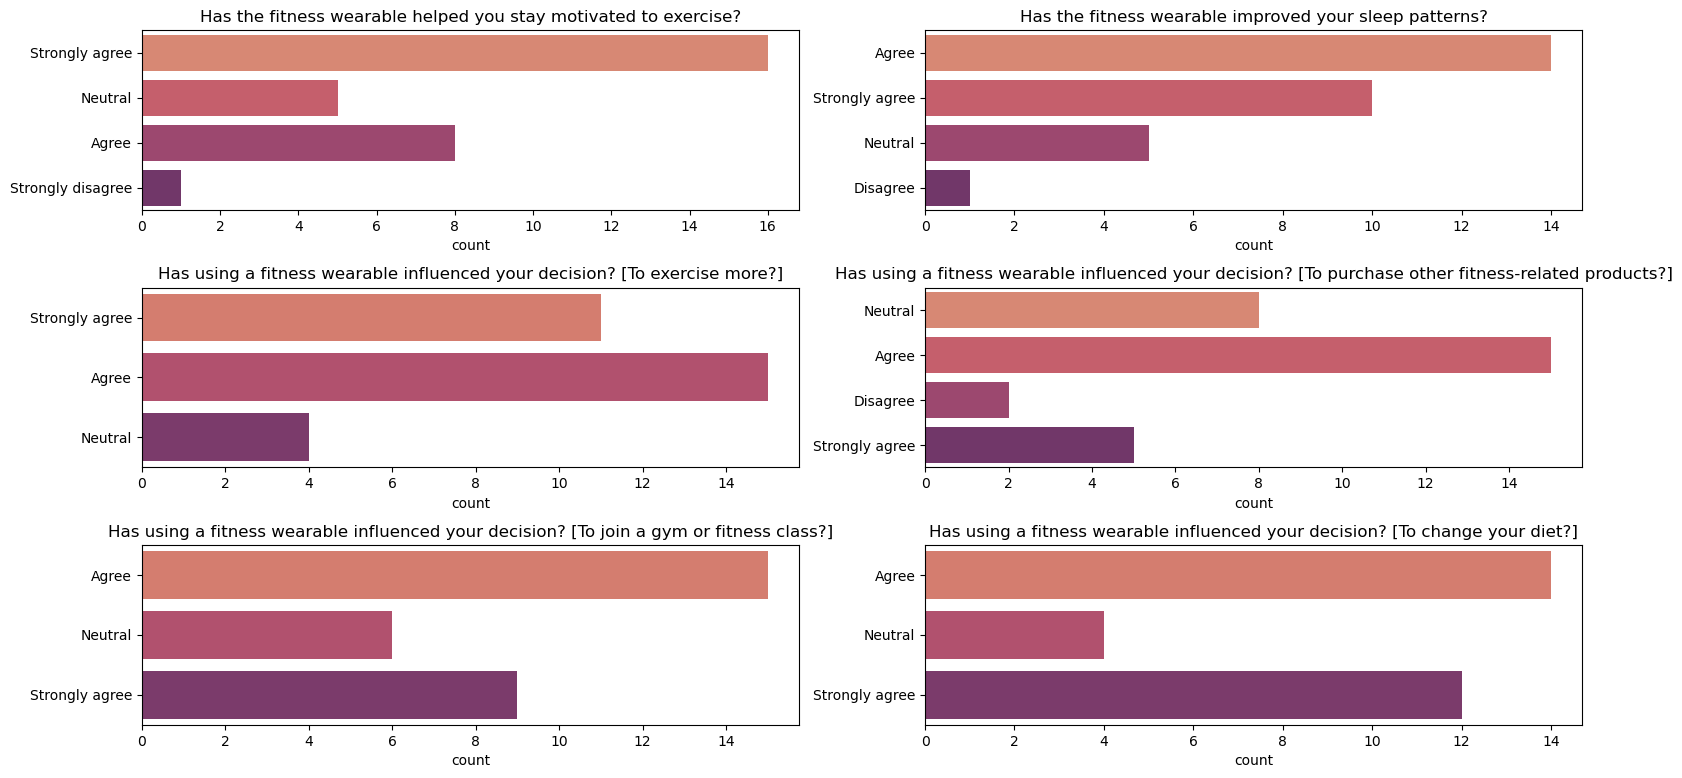

In [11]:
plt.figure(figsize=(16, 10))
for count, column in enumerate(has_columns):
    plt.subplot((len(has_columns) // 2) + 1,2 , count + 1)
    ax = sns.countplot(data=df, y=df.columns[column], palette="flare")
    ax.set(ylabel=None)
    plt.title(df.columns[column])
    plt.tight_layout(pad=1.)
plt.show()

Without any surprice, once again strongly positive feedback.
### Datasets consists of only 30 rows, which makes it hard to draw any conclusions. However, this survey strongly indicates that people using fitness wearables got influenced to live a healthier, more active life.